# Practice 7 - kNN, Decision Tree, SVM (correction)

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import warnings
warnings.filterwarnings('ignore')

**Loading the data set from Scikit-Learn**

In [2]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [3]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**Getting a description of the data set**

In [4]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [5]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [7]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


**To make the target encoding more obvious (we want to predict the risk of cancer), we invert the encoding values so that now 0 codes benign and 1 codes malignant**

In [8]:
target = target.replace({0:1, 1:0})
target.sample(n=8, random_state=1)

,tumor type
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


## Subject

We consider two predictors: mean radius and mean texture.
* Train a k-NN with k=5 and plot the decision areas based on that model.
* Explore different values of k to determine an optimal value.
* Train a k-NN with the optimal k you found.
* Train a Decision Tree and plot the decision areas based on that model.
* What would be an optimal value for the depth of the Decision Tree?  
*Hint*: you can use parameter max_depth of DecisionTreeClassifier.
* Train a Random Forest and plot the decision areas based on that model.  
*Bonus:* you can tune the hyperparameters of your Random Forest model (refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to see what parameters can be tuned). If you want to facilitate the optimization of many hyperparameters at once, you can use the [Grid Search method](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 
* Train a SVM (with linear kernel) and plot the decision areas based on that model.
* Compare the performance between all models. Choose a comparison metric and explain your choice.
* Pick the best model, explain your choice, and compute its performance on unseen test data (unseen means your model was never trained or tuned on it).

# Suggestion of solution

We consider two predictors: mean radius and mean texture.
* Train a k-NN with k=5 and plot the decision areas based on that model

**Preparing the data set**

In [9]:
X = features[['mean radius', 'mean texture']]
X.head()

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [10]:
target.shape

(569, 1)

In [11]:
target.values.reshape(-1,).shape

(569,)

**You can also do this**

In [12]:
y = target.values.ravel()
y.shape

(569,)

**Train-val-test split:**

Careful! Here we need three datasets: train-validation-test (unless you do k-fold cross validation)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)
print ('Train set:\t', X_train.shape,  y_train.shape)
print('Validation set: ', X_val.shape, y_val.shape)
print ('Test set:\t', X_test.shape,  y_test.shape)

Train set:	 (341, 2) (341,)
Validation set:  (114, 2) (114,)
Test set:	 (114, 2) (114,)


**Feature scaling:**

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

**Training a k-NN model:**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = {'classifier': KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')}
knn['classifier'].fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

**Plotting the decision areas**

In [16]:
# We define a function for plotting the 2D decision areas of a classifier

def plot_decision_areas(X_toplot, y_toplot, classifier):
    
    from matplotlib.colors import ListedColormap
    fig = plt.figure(figsize=(10, 6))

    # Preparation of the data set that will be displayed (without scaling)
    X_set, y_set = sc.inverse_transform(X_toplot), y_toplot

    # Creation of a data grid (for the decision area)
    X_step = 0.05  # Grid step on X-axis
    Y_step = 0.05  # Grid step on Y-axis
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = X_step),
        np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = Y_step))

    # Plotting the decision boundary
    plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))

    # Plotting the data set
    for y_set_index, y_set_value in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == y_set_value, 0], X_set[y_set == y_set_value, 1], color = ListedColormap(('red', 'green'))(y_set_index), label = y_set_value)

    # Configuration of the figure
    plt.xlim(X_set[:,0].min(), X_set[:,0].max())
    plt.ylim(X_set[:,1].min(), X_set[:,1].max())
    plt.legend(title='Tumor type')
    plt.title(str(classifier))
    plt.xlabel('Mean radius')
    plt.ylabel('Mean texture')

    plt.show()

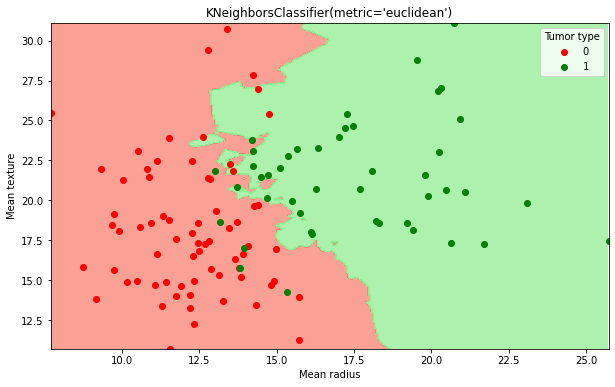

In [17]:
plot_decision_areas(X_val, y_val, knn['classifier'])

The "islands" of red illustrate a probable over-fit of the model. The k value seems to be too small here.

* Explore different values of k to determine an optimal value

**Computing the model accuracy for different values of k to find an optimal value**

We choose recall as the metric we want to optimize

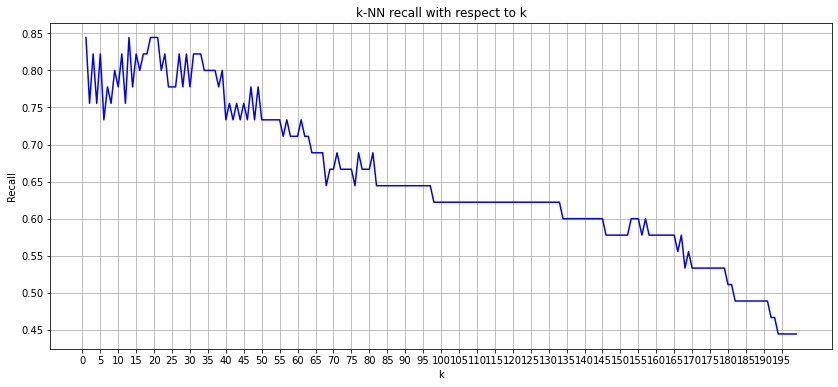

In [19]:
from sklearn.metrics import recall_score

k_list = range(1,200)
recall_list = []

# Compute the accuracy of the k-NN trained with different values of k
for k in k_list:
    knn_candidate = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    knn_candidate.fit(X_train, y_train)
    y_pred = knn_candidate.predict(X_val)
    recall_list.append(recall_score(y_val, y_pred))

# Plot the accuracy with respect to k
fig, axs = plt.subplots(1,1, figsize=(14,6))
axs.plot(k_list, recall_list, label='recall', c='b')
axs.set_title('k-NN recall with respect to k')
axs.set_xlabel('k')
axs.set_ylabel('Recall')
axs.set_xticks(range(0,200,5))
axs.grid()
plt.show()

##### k = 20 seems to be optimal because it corresponds to a maximum recall. Let's check what is the decisions boundary that we obtain with such value.

* Train a k-NN with the optimal k you found.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = {'classifier': KNeighborsClassifier(n_neighbors = 20, metric = 'euclidean')}
knn['classifier'].fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

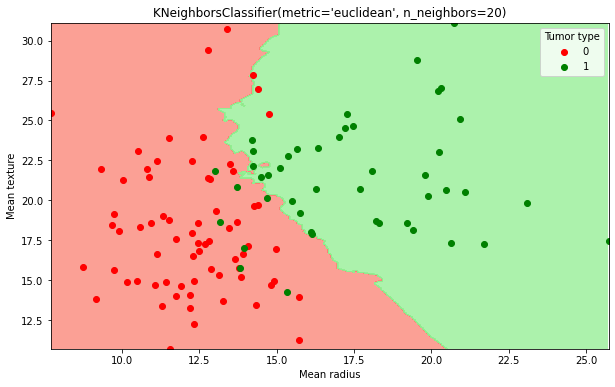

In [21]:
plot_decision_areas(X_val, y_val, knn['classifier'])

* Train a Decision Tree and plot the decision areas based on that model

**Training a Decision Tree model**

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0)}
dt['classifier'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

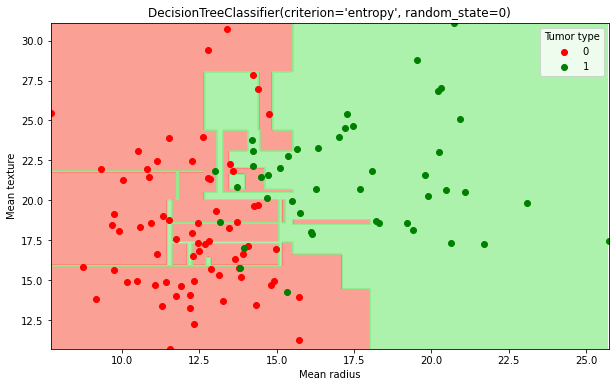

In [23]:
plot_decision_areas(X_val, y_val, dt['classifier'])

* What would be an optimal value for the depth of the Decision Tree?  
*Hint*: you can use parameter max_depth of DecisionTreeClassifier.

Let's check the depth of this Decision Tree (i.e. the number of levels).

In [24]:
dt['classifier'].get_depth()

16

Let's check the number of leaves of this Decision Tree (i.e. the number of boxes).

In [25]:
dt['classifier'].get_n_leaves()

48

It seems to have to many boxes, leading to over-fit. Let's try to find the optimal depth of the Decision Tree.

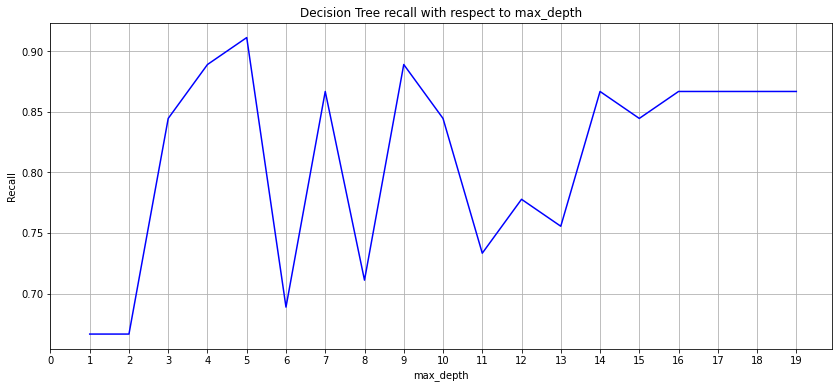

In [26]:
max_depth_list = range(1,20)
recall_list = []

# Compute the accuracy of the Decision Tree for different values of max_depth
for max_depth in max_depth_list:
    dt_candidate = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = max_depth)
    dt_candidate.fit(X_train, y_train)
    y_pred = dt_candidate.predict(X_val)
    recall_list.append(recall_score(y_val, y_pred))

# Plot the accuracy with respect to k
fig, axs = plt.subplots(1,1, figsize=(14,6))
axs.plot(max_depth_list, recall_list, label='recall', c='b')
axs.set_title('Decision Tree recall with respect to max_depth')
axs.set_xlabel('max_depth')
axs.set_xticks(range(0,20))
axs.set_ylabel('Recall')
axs.grid()
plt.show()

It seems that a depth of 5 would maximize the Decision Tree's recall.

In [27]:
dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 5)}
dt['classifier'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

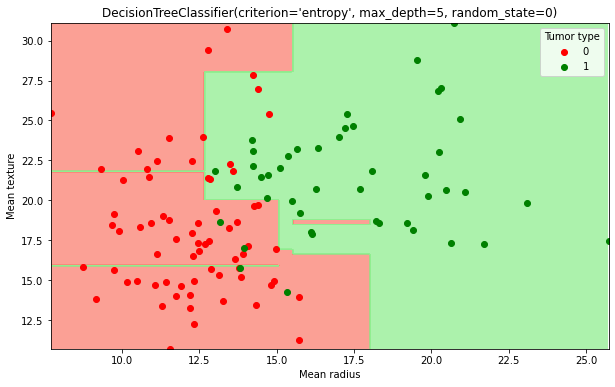

In [28]:
plot_decision_areas(X_val, y_val, dt['classifier'])

It seems to have slightly reduced the over-fit.

* Train a Random Forest and plot the decision areas based on that model

**Training a Random Forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = {'classifier': RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)}
rf['classifier'].fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

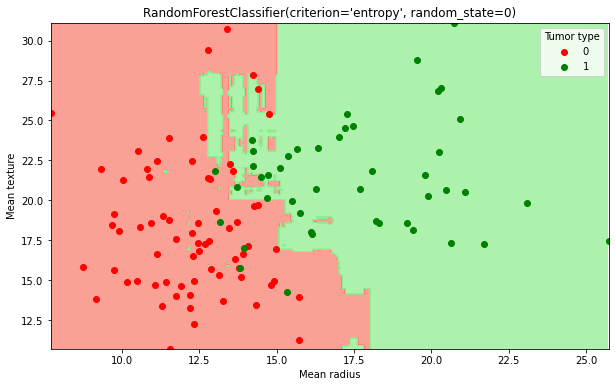

In [34]:
plot_decision_areas(X_val, y_val, rf['classifier'])

**Bonus:** you can tune the hyperparameters of your Random Forest model (refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to see what parameters can be tuned). If you want to facilitate the optimization of many hyperparameters at once, you can use the [Grid Search method](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10, 50, 100, 500, 1000],
    "criterion": ['gini', 'entropy'],
    "max_depth": range(2,10),
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state = 0),
    param_grid,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

GridSearch already implements k-fold cross validation, so we don't need to separate train and validation data for it. Normally, you would either use hold out validation, or k-fold validation in your entire Notebook. Here I show you both.

In [66]:
X_grid_search = np.vstack([X_train, X_val])
y_grid_search = np.append(y_train, y_val)

grid_search.fit(X_grid_search, y_grid_search)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='recall', verbose=1)

**Hyperparameters and recall of the best tree**

In [67]:
tuned_rf = {'classifier': grid_search.best_estimator_}
tuned_rf['classifier']

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=0)

In [71]:
tuned_rf['recall'] = grid_search.best_score_
tuned_rf['recall']

0.8484848484848484

* Train a SVM (with linear kernel) and plot the decision areas based on that model.

**Training a SVM model**

In [72]:
from sklearn.svm import SVC

svm = {'classifier': SVC(kernel = 'linear', random_state = 0, probability = True)}
svm['classifier'].fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

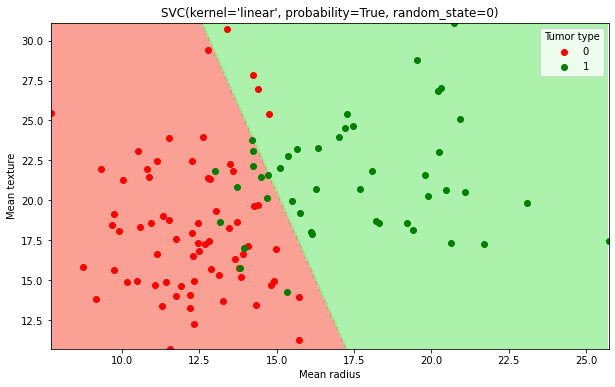

In [73]:
plot_decision_areas(X_val, y_val, svm['classifier'])

* Compare the performance between all models. Choose a comparison metric and explain your choice.


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

# We prepare the list of classifiers to evaluate
classifier_list = [knn, dt, svm, rf]

# We prepare an empty dataframe to store all the performance values
performance_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'AUC'])

# We make a loop on each classifier to compute each performance metric
for classifier in classifier_list:
    
    classifier['y_pred'] = classifier['classifier'].predict(X_val)
    classifier['y_proba'] = classifier['classifier'].predict_proba(X_val)
    classifier['y_score'] = classifier['y_proba'][:,1]
    
    accuracy = round(accuracy_score(y_val, classifier['y_pred']),2)
    precision = round(precision_score(y_val, classifier['y_pred']),2)
    recall = round(recall_score(y_val, classifier['y_pred']),2)
    auc = round(roc_auc_score(y_val, classifier['y_pred']),2)
    
    classifier_name = classifier['classifier'].__class__.__name__
    performance_df[classifier_name] = [accuracy, precision, recall, auc]  # To add it in the dataframe as a new columns

In [81]:
performance_df['Tuned RandomForest'] = None
performance_df.loc['Recall', 'Tuned RandomForest'] = tuned_rf['recall']

In [82]:
performance_df

,KNeighborsClassifier,DecisionTreeClassifier,SVC,RandomForestClassifier,Tuned RandomForest
Accuracy,0.91,0.90,0.86,0.92,None
Precision,0.93,0.85,0.89,0.93,None
Recall,0.84,0.91,0.73,0.87,0.848485
AUC,0.90,0.90,0.84,0.91,None


We choose recall as the comparison metric because we want to avoid false negatives as much as possible when detecting tumors.

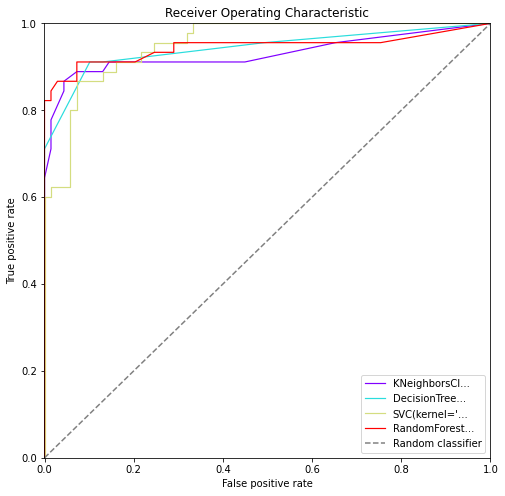

In [83]:
plt.subplots(1, figsize=(8,8))
plt.title('Receiver Operating Characteristic')
    
# Plot ROC curve for each classifier
color_list = plt.cm.get_cmap('rainbow', len(classifier_list))
for i, classifier in enumerate(classifier_list):
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, classifier['y_score'])
    plt.plot(false_positive_rate, true_positive_rate, c=color_list(i), linewidth=1.2, label=str(classifier['classifier'])[:12]+'...')

# Plot ROC curve for a random classifier
plt.plot([0, 1], ls='--', c='grey', label='Random classifier')

plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

* Pick the best model, explain your choice, and compute its performance on unseen test data (unseen means your model was never trained or tuned on it).

The Decision Tree model has the best recall, and also has good accuracy and AUC. We will choose this one.

#### Calculating performance on unseed data : TEST DATASET!

In [93]:
final_model = dt['classifier']

In [94]:
from sklearn.metrics import classification_report

y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        67
           1       0.82      0.85      0.83        47

    accuracy                           0.86       114
   macro avg       0.85      0.86      0.86       114
weighted avg       0.86      0.86      0.86       114



We can say that your final model (Decision Tree) has a recall score of 0.85 for malignant tumors.  
It also has an f1-score of 0.83 and an overall accuracy of 0.86.  
It seems that the recall calculated on the validation set was an overestimate.